## Importing Libraries

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


### Loading Model

In [37]:
model = tf.keras.models.load_model('trained_model1.keras')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

## Visualizing Single Image of test set

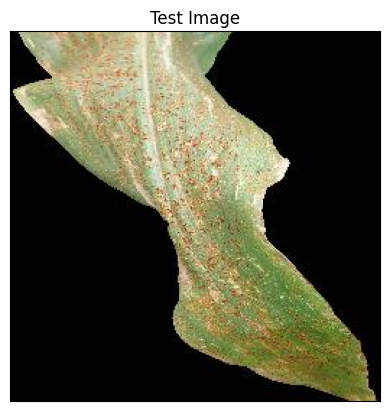

In [38]:
import cv2
image_path = 'test\CornCommonRust3.JPG'
# reading image
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # converting BGR to RGB
# displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model

In [39]:
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
print(input_arr.shape)

(1, 128, 128, 3)


In [40]:
predictions = model.predict(input_arr)
print(predictions)

1/1 [==============================] - 0s 347ms/step
[[5.7502948e-06 1.2901623e-06 7.7359045e-06 4.0559553e-06 1.8774233e-05
  2.4435454e-05 2.7146750e-06 3.5294784e-06 5.5164251e-06 8.8729843e-07
  3.4687725e-06 2.1100607e-07 1.4621966e-06 9.4541832e-07 3.4035886e-06
  3.3633759e-07 7.9277629e-07 1.1105043e-06 9.8476148e-06 1.2291348e-05
  2.1071489e-07 2.6852802e-06 2.4345644e-07 3.1181401e-07 4.9876041e-07
  3.1538042e-05 8.0188048e-01 3.0276997e-06 1.4455005e-06 1.9769244e-01
  3.3123688e-05 2.3028768e-07 3.6699930e-06 3.3553104e-06 9.0399163e-07
  1.2336718e-06 8.7925187e-08 6.5399618e-06 1.9896200e-07 5.1343494e-07
  6.2902529e-08 3.1473426e-06 2.0774543e-07 3.4116852e-07 1.6863123e-07
  4.0463004e-08 3.9304601e-07 6.2928450e-08 1.0258798e-06 4.5156926e-06
  1.6553190e-06 2.4006001e-06 2.1911603e-06 4.6790824e-06 2.6635955e-06
  1.2276224e-07 3.0331313e-07 5.3255608e-05 1.3103663e-05 1.2797146e-06
  6.7608920e-07 2.1457281e-06 4.7536534e-07 3.2884978e-07 8.8376333e-07
  1.1921223

In [41]:
result_index = np.argmax(predictions)
result_index

26

In [42]:
import os

# making a list of folders in the valid directory
classes = [f for f in os.listdir('valid') if os.path.isdir(os.path.join('valid', f))]
print(classes)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Apple___rust', 'Apple___scab', 'Blueberry___healthy', 'Cassava___bacterial_blight', 'Cassava___brown_streak_disease', 'Cassava___green_mottle', 'Cassava___healthy', 'Cassava___mosaic_disease', 'Cherry_(including_sour)___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry___healthy', 'Cherry___powdery_mildew', 'Chili___healthy', 'Chili___leaf curl', 'Chili___leaf spot', 'Chili___whitefly', 'Chili___yellowish', 'Coffee___cercospora_leaf_spot', 'Coffee___healthy', 'Coffee___red_spider_mite', 'Coffee___rust', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn___common_rust', 'Corn___gray_leaf_spot', 'Corn___healthy', 'Corn___northern_leaf_blight', 'Cucumber___diseased', 'Cucumber___healthy', 'Gauva___diseased', 'Gauva___healthy', 'Grape___black_measles', 'Grape___Black_rot', 'Grape___Es

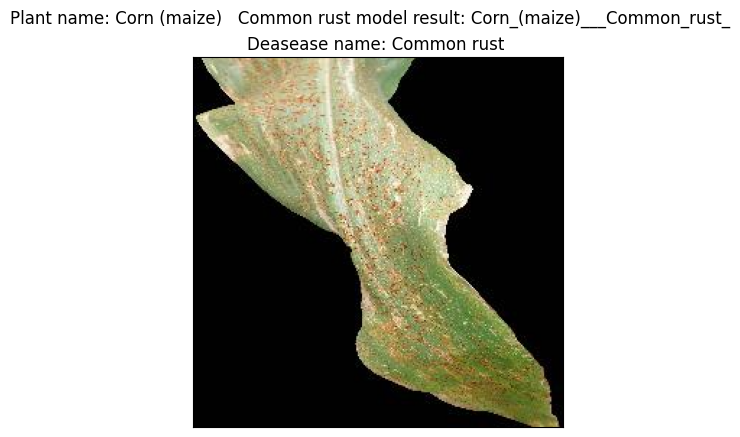

In [43]:
# displaying result
model_result = classes[result_index]
plant_name = ' '.join(model_result.split('_')[:-1])
deasease_name = ' '.join(model_result.split('___')[1].split('_'))
plt.imshow(img)
plt.suptitle(f'Plant name: {plant_name} model result: {model_result}')
plt.title(f'Deasease name: {deasease_name}')
plt.xticks([])
plt.yticks([])
plt.show()